In [1]:
import pandas as pd

data = pd.read_csv('diabetes_data.csv')

print('\nShow first 5 rows: ', data.head())
print('\nShow the size of the data set: ', data.shape)

<ipython-input-1-2e7a55267a03>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



Show first 5 rows:     age  gender    bmi bmi_category  systolic  diastolic  \
0   55  Female  29.59   Overweight     112.0       89.5   
1   34    Male  30.68      Obesity     106.0      115.0   
2   26    Male  15.96  Underweight      96.0       97.0   
3   63    Male  15.61  Underweight     109.6      115.3   
4   37    Male  41.54      Obesity     110.0      103.0   

  blood_pressure_category  cholesterol cholesterol_category  glucose  \
0    Hypertension Stage 1          247                 High      139   
1    Hypertension Stage 2          255                 High      101   
2    Hypertension Stage 2          234      Borderline high       97   
3    Hypertension Stage 2          261                 High      143   
4    Hypertension Stage 2          226      Borderline high      115   

   diabetes_probability  
0                  0.65  
1                  0.60  
2                  0.15  
3                  0.70  
4                  0.50  

Show the size of the data set:  (1

In [2]:
gender_encoded = pd.get_dummies(data['gender'], prefix = 'gender', drop_first = False)
data = pd.concat([data, gender_encoded], axis = 1)
data[['gender_Female', 'gender_Male']] = data[['gender_Female', 'gender_Male']].astype(int)

bmi_map = {'Underweight': 1, 'Normal weight': 2, 'Overweight': 3, 'Obesity': 4}
data['bmi_category_encoded'] = data['bmi_category'].map(bmi_map)

bp_map = {
    'Normal': 1,
    'Elevated': 2,
    'Hypertension Stage 1': 3,
    'Hypertension Stage 2': 4,
    'Hypertensive Crisis': 5
}
data['blood_pressure_category_encoded'] = data['blood_pressure_category'].map(bp_map)

cholesterol_map = {'Normal': 1, 'Borderline high': 2, 'High': 3}
data['cholesterol_category_encoded'] = data['cholesterol_category'].map(cholesterol_map)

In [3]:
new_columns = data.drop(columns=['gender', 'bmi_category', 'blood_pressure_category', 'cholesterol_category'])
print('\nShow first 5 rows: ', data.head())
print('\nShow the size of the data set: ', data.shape)


Show first 5 rows:     age  gender    bmi bmi_category  systolic  diastolic  \
0   55  Female  29.59   Overweight     112.0       89.5   
1   34    Male  30.68      Obesity     106.0      115.0   
2   26    Male  15.96  Underweight      96.0       97.0   
3   63    Male  15.61  Underweight     109.6      115.3   
4   37    Male  41.54      Obesity     110.0      103.0   

  blood_pressure_category  cholesterol cholesterol_category  glucose  \
0    Hypertension Stage 1          247                 High      139   
1    Hypertension Stage 2          255                 High      101   
2    Hypertension Stage 2          234      Borderline high       97   
3    Hypertension Stage 2          261                 High      143   
4    Hypertension Stage 2          226      Borderline high      115   

   diabetes_probability  gender_Female  gender_Male  bmi_category_encoded  \
0                  0.65              1            0                     3   
1                  0.60              

In [4]:
new_data_columns = ['age', 'gender_Female', 'gender_Male', 'bmi', 'bmi_category_encoded', 'systolic', 'diastolic', 'blood_pressure_category_encoded',
            'cholesterol', 'cholesterol_category_encoded', 'glucose', 'diabetes_probability']
new_data = data[new_data_columns]

print('\nShow first 5 rows: ', data.head())
print('\nShow the size of the data set: ', data.shape)


Show first 5 rows:     age  gender    bmi bmi_category  systolic  diastolic  \
0   55  Female  29.59   Overweight     112.0       89.5   
1   34    Male  30.68      Obesity     106.0      115.0   
2   26    Male  15.96  Underweight      96.0       97.0   
3   63    Male  15.61  Underweight     109.6      115.3   
4   37    Male  41.54      Obesity     110.0      103.0   

  blood_pressure_category  cholesterol cholesterol_category  glucose  \
0    Hypertension Stage 1          247                 High      139   
1    Hypertension Stage 2          255                 High      101   
2    Hypertension Stage 2          234      Borderline high       97   
3    Hypertension Stage 2          261                 High      143   
4    Hypertension Stage 2          226      Borderline high      115   

   diabetes_probability  gender_Female  gender_Male  bmi_category_encoded  \
0                  0.65              1            0                     3   
1                  0.60              

In [5]:
X = new_data[['age', 'gender_Female', 'gender_Male', 'bmi', 'bmi_category_encoded', 'systolic', 'diastolic', 'blood_pressure_category_encoded',
            'cholesterol', 'cholesterol_category_encoded', 'glucose']]
y = new_data['diabetes_probability']

In [6]:
from sklearn.model_selection import train_test_split

y_binary = (y >= 0.5).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [9]:
import numpy as np

explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1

print(f'The variance explained by each principal component: {pca.explained_variance_ratio_}')
print(f'Number of main components: {pca.n_components_}')

The variance explained by each principal component: [0.3210872  0.19201202 0.16696104 0.11345273 0.0962563  0.06119467]
Number of main components: 6


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1)
model.fit(X_train_pca, y_train)

LogisticRegression(C=0.1)

In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5)
print("Acuratetea medie în Cross-Validation: ", np.mean(cv_scores))

Acuratetea medie în Cross-Validation:  0.922875


In [12]:
y_pred = model.predict(X_test_pca)

In [13]:
%pip install seaborn

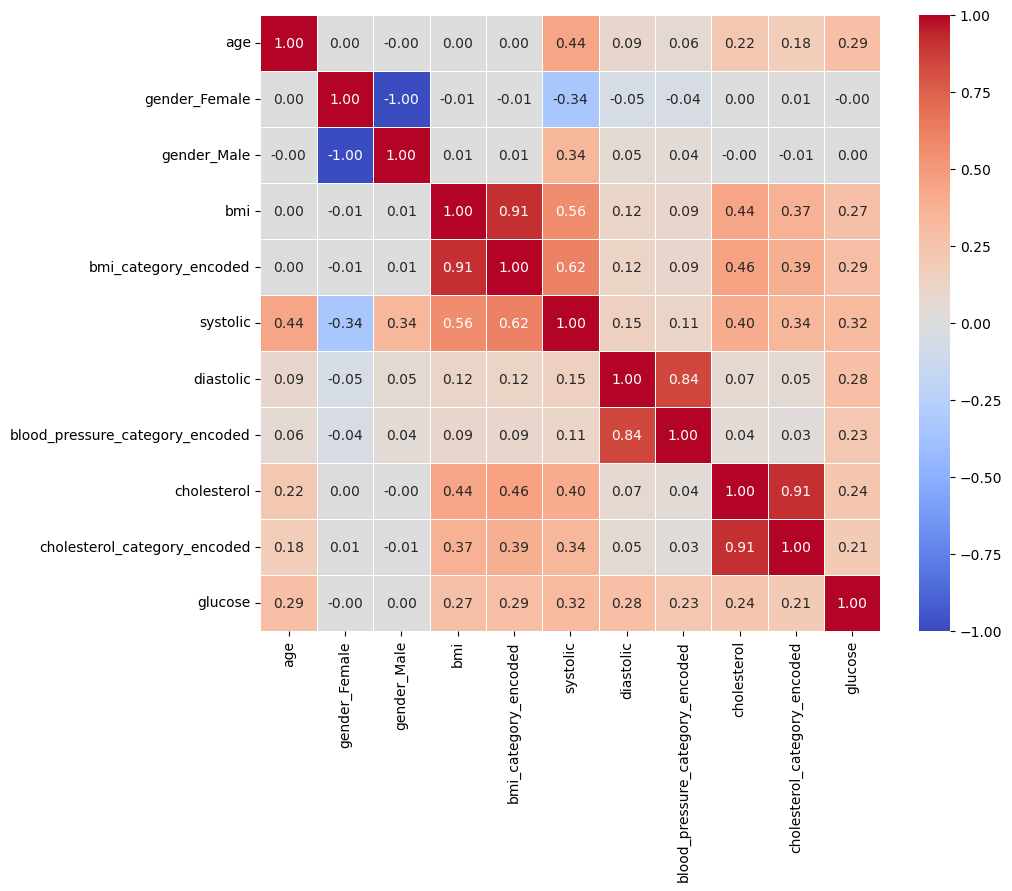

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Model accuracy:', accuracy_score(y_test, y_pred))
print('The confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('The classification report:\n', classification_report(y_test, y_pred))

Model accuracy: 0.9205
The confusion matrix:
 [[853  86]
 [ 73 988]]
The classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       939
           1       0.92      0.93      0.93      1061

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



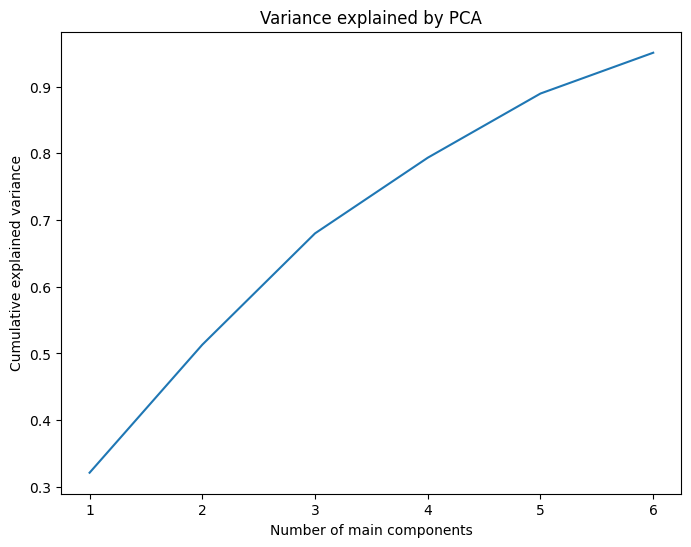

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Variance explained by PCA')
plt.show()